# Machine Learning with Large Datasets
## Machine Learning at Scale

In [1]:
# You are highly recommended to select the "PySpark" kernel instead of python kernel,
# Otherwise you need to modify this cell to get pyspark working.

from pyspark.sql import *

sc = spark.sparkContext
print(f'num executors: {sc.getConf().get("spark.executor.instances")}')

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1647958541177_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

num executors: 2

Throughout this assignment, you will be generating plots. `Matplotlib` and other useful Python libraries do not come pre-installed on the cluster. Therefore, you will have to ssh into your master node (think about why it should be the master) using your keypair created earlier and install `matplotlib`. You might have to do this later again for other libraries you use, e.g. `Pandas`.

Run the below cell to ensure you installation was successful. If an error occurs, you might want to double check your installation.

In [2]:
import pyspark

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
import numpy as np
print(np.__version__)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1.21.5

In [4]:
import matplotlib.pyplot as plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
import pandas as pd

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### 1. Data Loading and Preparation

Earlier, we have extracted relevant features from and converted format of the full raw Million Song Dataset. We now want to load our converted dataset from the S3 Storage.

Note that although you can load all chunks of the dataset using `*`, we recommend you only load in a subset while developing so that processing takes shorter time when you are just verifying your ideas. Be sure to add your own S3 bucket name to cmd 8.

In [6]:
from pyspark.sql.types import DoubleType, StringType, StructField, StructType

schema = StructType([StructField('song_hotttnesss', DoubleType(), True),
                       StructField('artist_familiarity', DoubleType(), True),
                       StructField('artist_hotttnesss', DoubleType(), True),
                       StructField('artist_id', StringType(), True),
                       StructField('artist_latitude', DoubleType(), True),
                       StructField('artist_location', StringType(), True),
                       StructField('artist_longitude', DoubleType(), True),
                       StructField('artist_name', StringType(), True),
                       StructField('title', StringType(), True),
                       StructField('danceability', DoubleType(), True),
                       StructField('duration', DoubleType(), True),
                       StructField('end_of_fade_in', DoubleType(), True),
                       StructField('energy', DoubleType(), True),
                       StructField('key', DoubleType(), True),
                       StructField('key_confidence', DoubleType(), True),
                       StructField('loudness', DoubleType(), True),
                       StructField('mode', DoubleType(), True),
                       StructField('mode_confidence', DoubleType(), True),
                       StructField('start_of_fade_out', DoubleType(), True),
                       StructField('tempo', DoubleType(), True),
                       StructField('time_signature', DoubleType(), True),
                       StructField('time_signature_confidence', DoubleType(), True),
                       StructField('artist_terms', StringType(), True),
                       StructField('artist_terms_freq', StringType(), True),
                       StructField('artist_terms_weight', StringType(), True),
                       StructField('year', DoubleType(), True)]
                   )

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
#--------------------------------------------------------------------
#Set to False after writing your code and run end-to-end on full data
#--------------------------------------------------------------------
load_subset = False
#----------------------------
#Add your s3 bucket name below:
#----------------------------
s3_bucket_name = 'shaofenq'

if load_subset:
    df = spark.read.format("csv")\
        .option("header", "false")\
        .option("nanValue", "nan")\
        .option("quote", "\"")\
        .option("escape", "\"")\
        .schema(schema)\
        .load(f"s3://{s3_bucket_name}/processed/A_1.csv")
else:
    df = spark.read.format("csv")\
        .option("header", "false")\
        .option("nanValue", "nan")\
        .option("quote", "\"")\
        .option("escape", "\"")\
        .schema(schema)\
        .load(f"s3://{s3_bucket_name}/processed/*.csv")

print('loaded {} records'.format(df.count()))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

loaded 581965 records

Inspect the `df` we just created by running the below cell:

In [128]:
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- song_hotttnesss: double (nullable = true)
 |-- artist_familiarity: double (nullable = true)
 |-- artist_hotttnesss: double (nullable = true)
 |-- artist_id: string (nullable = true)
 |-- artist_latitude: double (nullable = true)
 |-- artist_location: string (nullable = true)
 |-- artist_longitude: double (nullable = true)
 |-- artist_name: string (nullable = true)
 |-- title: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration: double (nullable = true)
 |-- end_of_fade_in: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: double (nullable = true)
 |-- key_confidence: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: double (nullable = true)
 |-- mode_confidence: double (nullable = true)
 |-- start_of_fade_out: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- time_signature_confidence: double (nullable = true)
 |-- artist_terms: string

<div align="center">
    <h1>------------------- Part B Begins ------------------- </h1>
</div>

### 2. Exploratory Data Analysis

Now we have our data mostly ready. It's a good time to take some deeper look to better understand what we are dealing with here.

First, show summary statistics of the features using `.summary()`. Hint: because we have many features, the output might be too long for a single line. The simplest way to resolve this mess is to copy paste the output to some editor (e.g. vscode) and check the result. Another way is you could select only a few features to print at a time so that things could fit into one line.

In [11]:
# YOUR CODE HERE
df.select(["song_hotttnesss", "energy", "loudness"]).summary().show()

# YOUR CODE HERE
df.select(["danceability", "energy"]).summary().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------------+------+------------------+
|summary|    song_hotttnesss|energy|          loudness|
+-------+-------------------+------+------------------+
|  count|             581965|581965|            581965|
|   mean| 0.3560510395614853|   0.0|-9.705873464899094|
| stddev| 0.2344409011741648|   0.0| 4.969266765337608|
|    min|                0.0|   0.0|           -58.178|
|    25%|0.21508031850922793|   0.0|           -12.147|
|    50%| 0.3775316449767025|   0.0|            -8.593|
|    75%| 0.5319846094668594|   0.0|            -6.138|
|    max|                1.0|   0.0|             4.318|
+-------+-------------------+------+------------------+

+-------+------------+------+
|summary|danceability|energy|
+-------+------------+------+
|  count|      581965|581965|
|   mean|         0.0|   0.0|
| stddev|         0.0|   0.0|
|    min|         0.0|   0.0|
|    25%|         0.0|   0.0|
|    50%|         0.0|   0.0|
|    75%|         0.0|   0.0|
|    max|         0.0|   0.

Now looking at the statistics, `danceability` and `energy` appear strange. ✰2.3(a) Explain why these features seem problematic in your writeup.

Now we would like to make some histogram plots to inspect the distribution of feature values. 

✰2.3(b) Plot histograms for `'song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'duration', 'tempo', 'year'`. 

Note that one of these features may appear weird. 

✰2.3(c) Explain what is weird about `year`'s distribution and what might cause this. Describe how you could filter `year` to make its histogram look more balanced. Hint: Choose a threshold and filter the `year` values.

✰2.3(d) Do it and include the new plot of this feature into your writeup.

Note: you may want to use the spark magic commands `%matplot plt` to show the plot.

In [53]:
#2.3b histograms
plt.cla()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [54]:
bins, counts = df.select('song_hotttnesss').rdd.flatMap(lambda x: x).histogram(20)

# This is a bit awkward but I believe this is the correct way to do it 
plt.hist(bins[:-1], bins=bins, weights=counts)
#df.select("song_hotttnesss").rdd.flatMap(lambda x: x).histogram(30)
plt.xlabel("song_hotttnesss")
plt.ylabel("count")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(28.097222222222214, 0.5, 'count')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

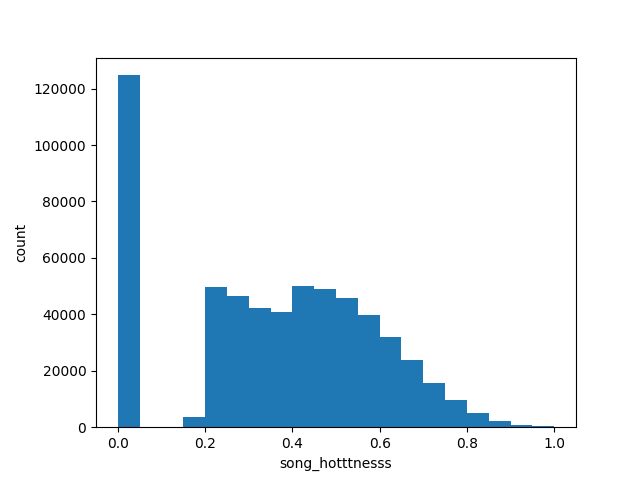

In [55]:
%matplot plt

In [56]:
plt.cla()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
bins, counts = df.select('artist_familiarity').rdd.flatMap(lambda x: x).histogram(20)

# This is a bit awkward but I believe this is the correct way to do it 
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.xlabel("artist_familiarity")
plt.ylabel("count")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(28.097222222222214, 0.5, 'count')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

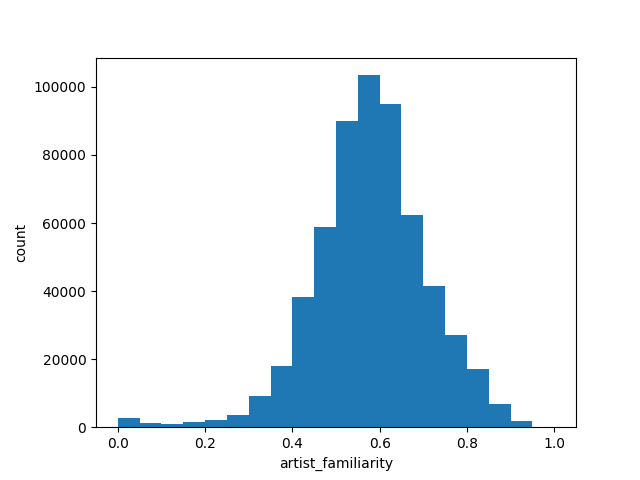

In [58]:
%matplot plt

In [59]:
plt.cla()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [60]:
bins, counts = df.select('artist_hotttnesss').rdd.flatMap(lambda x: x).histogram(20)

# This is a bit awkward but I believe this is the correct way to do it 
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.xlabel("artist_hotttnesss")
plt.ylabel("count")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(28.097222222222214, 0.5, 'count')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

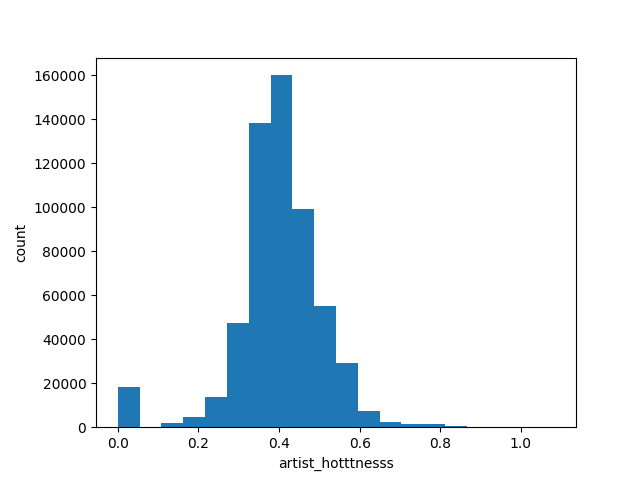

In [61]:
%matplot plt

In [62]:
plt.cla()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [63]:
bins, counts = df.select('duration').rdd.flatMap(lambda x: x).histogram(20)

# This is a bit awkward but I believe this is the correct way to do it 
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.xlabel("duration")
plt.ylabel("count")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(27.972222222222214, 0.5, 'count')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

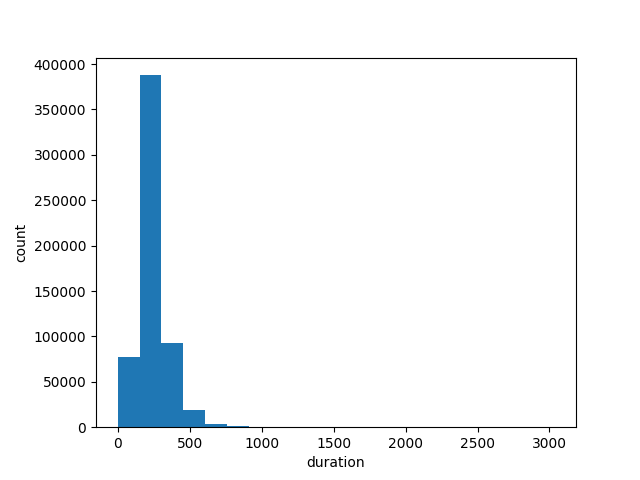

In [64]:
%matplot plt

In [65]:
plt.cla()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [66]:
bins, counts = df.select('tempo').rdd.flatMap(lambda x: x).histogram(20)

# This is a bit awkward but I believe this is the correct way to do it 
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.xlabel("tempo")
plt.ylabel("count")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(28.097222222222214, 0.5, 'count')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

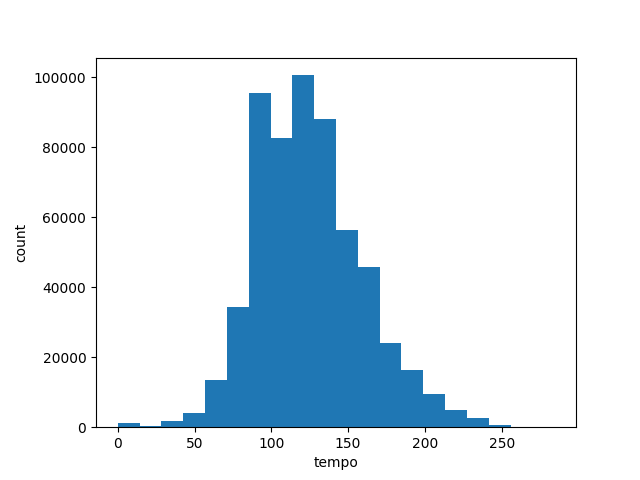

In [68]:
%matplot plt

In [69]:
plt.cla()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [70]:
bins, counts = df.select('year').rdd.flatMap(lambda x: x).histogram(20)

# This is a bit awkward but I believe this is the correct way to do it 
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.xlabel("year")
plt.ylabel("count")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(28.097222222222214, 0.5, 'count')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

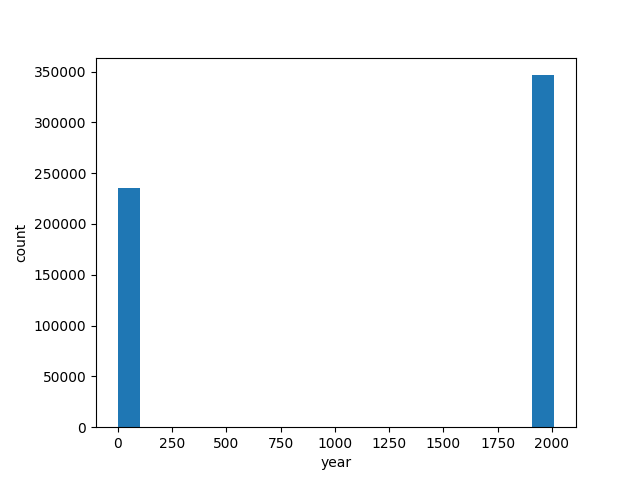

In [71]:
%matplot plt

2.3c 
Year's distribution is strange because it only has data on two ends, no distribution over the middle range.
I think the year data may be taken mistakenly since data around 0 doesnot making sense. We can filter out those data around 0 and only keep data around 2000.

In [72]:
# 2.3d
plt.cla()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [73]:
bins, counts = df.select('year').rdd.flatMap(lambda x: x).filter(lambda x: x!=0).histogram(20)

# This is a bit awkward but I believe this is the correct way to do it 
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.xlabel("year")
plt.ylabel("count")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(28.097222222222214, 0.5, 'count')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

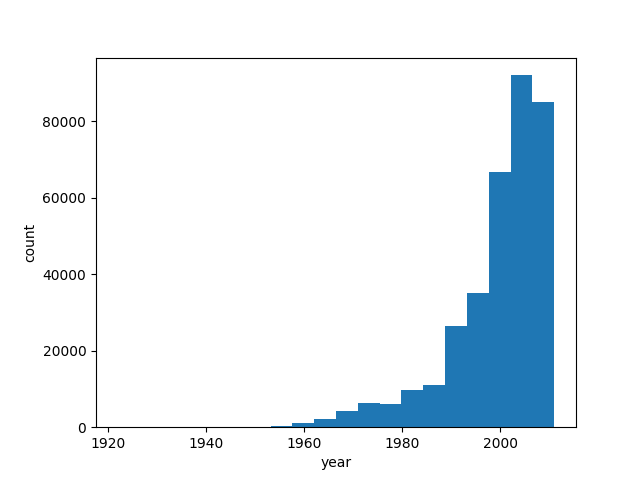

In [74]:
%matplot plt

Some scatter pair plots would also be interesting to see the correlation between features. ✰2.3(e) Include the plots of the following pairs of features and describe your findings (e.g. what patterns you observe) in your writeup.
- `song_hotttnesss` against `artist_familiarity`
- `artist_latitude` against `artist_longitude`
- `song_hotttnesss` against `year`

Plotting all data points might explode matplotlib. Think about what simple technique you could use to visualize large datasets while retaining data distribution. ✰2.3(f) In your writeup, briefly describe what you did.

In [106]:
plt.cla()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [107]:
# YOUR CODE HERE
song_hotttnesss_sampled = df.select(['song_hotttnesss']).rdd.sample(False, 0.001, 81).collect()
artist_familiarity_sampled = df.select(['artist_familiarity']).rdd.sample(False, 0.001, 81).collect()
plt.scatter(artist_familiarity_sampled,song_hotttnesss_sampled)
plt.xlabel("artist_familiarity")
plt.ylabel("song_hotttnesss")
plt.show()
# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

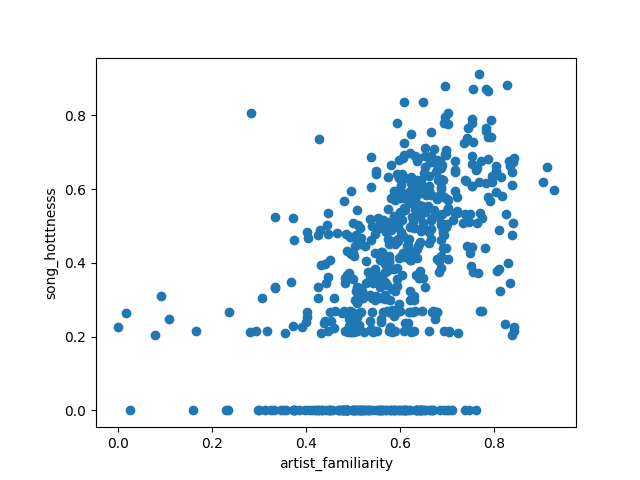

In [108]:
%matplot plt

In [111]:
plt.cla()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [112]:
year = df.select("year").filter(df.year>0).sample(False, 0.001, 81).collect()
song_hottness = df.select('song_hotttnesss').filter(df.year>0).sample(False, 0.001, 81).collect()

plt.scatter(year, song_hottness)
plt.xlabel("year")
plt.ylabel("song_hotttness")
plt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

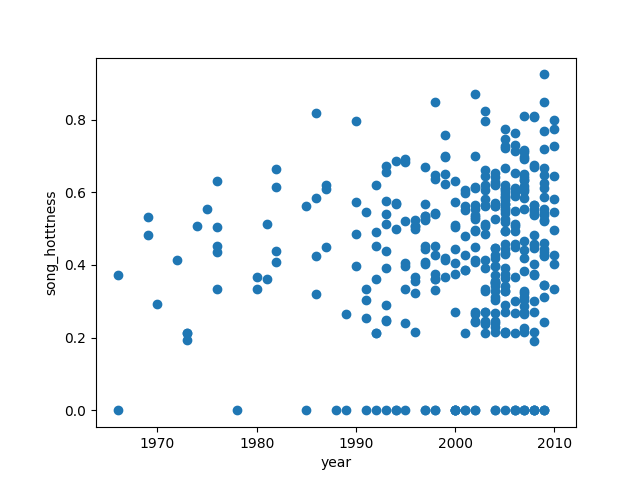

In [113]:
%matplot plt

In [88]:
plt.cla()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [89]:
artist_longitude_sampled = df.select(['artist_longitude']).rdd.sample(False, 0.001, 81).collect()
artist_latitude_sampled = df.select(['artist_latitude']).rdd.sample(False, 0.001, 81).collect()
plt.scatter(artist_longitude_sampled,artist_latitude_sampled)
plt.xlabel('artist_longitude')
plt.ylabel('artist_latitude')
plt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

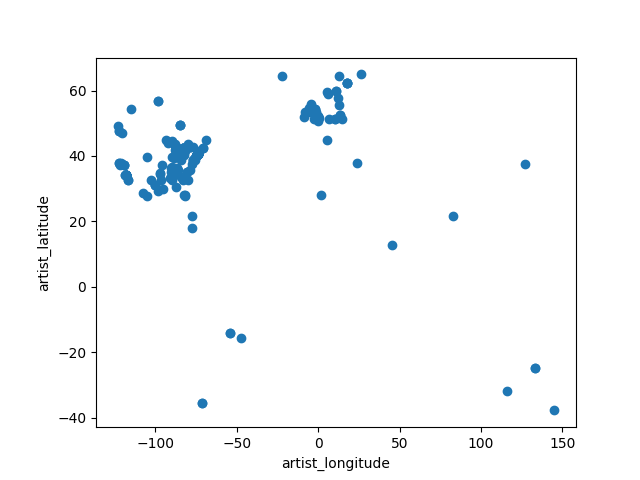

In [90]:
%matplot plt

2.3e
Findings: we can see artist longitude and latitude are quite independent to each other, such that they lie in tow cluster ranges as shown above. From the song_hotttnesss against artist_familiarity, we can see the geeral trend is the higher artist_familiarity, the higher song_hotttnesss. From song_hotttnesss against year, we can see aournd 2000, people's song hotness has similar ranges but with more data points.

2.3f
we can use random smapling technique to retain the same distribution in the large dataset to a smaller subset, and we need to fix seed to make the relationship between two features accordingly.

### 3. Data Cleaning

From 2, you should have had a basic understanding of the dataset. In this cleaning step, we are dropping `energy` and `danceability` features. 

✰2.4(a) In your writeup, justify why we are doing this.

We drop energy and danceability because data inside those two columns are all zeros.

In [120]:
df.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

581965

In [8]:
# YOUR CODE HERE
df = df.select([c for c in df.columns if c not in {'energy', 'danceability'}])

#df = df.drop(['energy', 'danceability'])
# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
df.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'title', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'year']

For simplicity, we are dropping `year` values that are less or equal to 1920. Print out the number of samples before and after dropping these rows. 

✰2.4(b) In your writeup, compare these two numbers and explain the advantages and potential problem of doing this step. What other techniques could you use to potentially do better?

In [10]:
# YOUR CODE HERE
# before dropping
sample_beforedropping = df.count()
print("before drop: ", sample_beforedropping)
#after dropping
df = df.filter((df["year"] > 1920))
sample_afterdropping = df.count()
print("after drop: ", sample_afterdropping )
# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

before drop:  581965
after drop:  346444

Now, let's do an NaN check to see if there are other problematic features. Print the number of entries that contain NaN for each feature. 

Hint: use pyspark sql `count(when(isnull(...)))` to count total Null entries for a feature. Replace `isnull` with `isnan` to count nan entries.

In [145]:
df.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'title', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'year']

In [147]:
df.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

346444

In [155]:
# 2.4c
from pyspark.sql.functions import isnan, when, count, isnull
df.select(count(when(isnan(df.song_hotttnesss), df.song_hotttnesss))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------------------------+
|count(CASE WHEN isnan(song_hotttnesss) THEN song_hotttnesss END)|
+----------------------------------------------------------------+
|                                                               0|
+----------------------------------------------------------------+

In [177]:
df.select(count(when(isnan(df.artist_familiarity), df.artist_familiarity))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------------------------------+
|count(CASE WHEN isnan(artist_familiarity) THEN artist_familiarity END)|
+----------------------------------------------------------------------+
|                                                                     1|
+----------------------------------------------------------------------+

In [159]:
df.select(count(when(isnan(df.artist_hotttnesss), df.artist_hotttnesss))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------------------------------+
|count(CASE WHEN isnan(artist_hotttnesss) THEN artist_hotttnesss END)|
+--------------------------------------------------------------------+
|                                                                   0|
+--------------------------------------------------------------------+

In [160]:
df.select(count(when(isnan(df.artist_id), df.artist_id))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------------+
|count(CASE WHEN isnan(artist_id) THEN artist_id END)|
+----------------------------------------------------+
|                                                   0|
+----------------------------------------------------+

In [182]:
df.select(count(when(isnan(df.artist_latitude), df.artist_latitude))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------------------------+
|count(CASE WHEN isnan(artist_latitude) THEN artist_latitude END)|
+----------------------------------------------------------------+
|                                                          219399|
+----------------------------------------------------------------+

In [162]:
df.select(count(when(isnan(df.artist_location), df.artist_location))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------------------------+
|count(CASE WHEN isnan(artist_location) THEN artist_location END)|
+----------------------------------------------------------------+
|                                                               0|
+----------------------------------------------------------------+

In [183]:
df.select(count(when(isnan(df.artist_longitude), df.artist_longitude))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------------------------------------------------+
|count(CASE WHEN isnan(artist_longitude) THEN artist_longitude END)|
+------------------------------------------------------------------+
|                                                            219399|
+------------------------------------------------------------------+

In [164]:
df.select(count(when(isnan(df.artist_name), df.artist_name))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------------------+
|count(CASE WHEN isnan(artist_name) THEN artist_name END)|
+--------------------------------------------------------+
|                                                       0|
+--------------------------------------------------------+

In [165]:
df.select(count(when(isnan(df.title), df.title))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------+
|count(CASE WHEN isnan(title) THEN title END)|
+--------------------------------------------+
|                                           0|
+--------------------------------------------+

In [166]:
df.select(count(when(isnan(df.duration), df.duration))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------------+
|count(CASE WHEN isnan(duration) THEN duration END)|
+--------------------------------------------------+
|                                                 0|
+--------------------------------------------------+

In [167]:
df.select(count(when(isnan(df.end_of_fade_in), df.end_of_fade_in))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------------------------+
|count(CASE WHEN isnan(end_of_fade_in) THEN end_of_fade_in END)|
+--------------------------------------------------------------+
|                                                             0|
+--------------------------------------------------------------+

In [168]:
df.select(count(when(isnan(df.key), df.key))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------+
|count(CASE WHEN isnan(key) THEN key END)|
+----------------------------------------+
|                                       0|
+----------------------------------------+

In [169]:
df.select(count(when(isnan(df.key_confidence), df.key_confidence))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------------------------+
|count(CASE WHEN isnan(key_confidence) THEN key_confidence END)|
+--------------------------------------------------------------+
|                                                             0|
+--------------------------------------------------------------+

In [170]:
df.select(count(when(isnan(df.loudness), df.loudness))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------------+
|count(CASE WHEN isnan(loudness) THEN loudness END)|
+--------------------------------------------------+
|                                                 0|
+--------------------------------------------------+

In [171]:
df.select(count(when(isnan(df.mode), df.mode))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------------------------+
|count(CASE WHEN isnan(mode) THEN mode END)|
+------------------------------------------+
|                                         0|
+------------------------------------------+

In [172]:
df.select(count(when(isnan(df.mode_confidence), df.mode_confidence))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------------------------+
|count(CASE WHEN isnan(mode_confidence) THEN mode_confidence END)|
+----------------------------------------------------------------+
|                                                               0|
+----------------------------------------------------------------+

In [173]:
df.select(count(when(isnan(df.start_of_fade_out), df.start_of_fade_out))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------------------------------+
|count(CASE WHEN isnan(start_of_fade_out) THEN start_of_fade_out END)|
+--------------------------------------------------------------------+
|                                                                   0|
+--------------------------------------------------------------------+

In [174]:
df.select(count(when(isnan(df.tempo), df.tempo))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------+
|count(CASE WHEN isnan(tempo) THEN tempo END)|
+--------------------------------------------+
|                                           0|
+--------------------------------------------+

In [175]:
df.select(count(when(isnan(df.time_signature), df.time_signature))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------------------------+
|count(CASE WHEN isnan(time_signature) THEN time_signature END)|
+--------------------------------------------------------------+
|                                                             0|
+--------------------------------------------------------------+

In [176]:
df.select(count(when(isnan(df.time_signature_confidence), df.time_signature_confidence))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------------------------------------------------------------------+
|count(CASE WHEN isnan(time_signature_confidence) THEN time_signature_confidence END)|
+------------------------------------------------------------------------------------+
|                                                                                   0|
+------------------------------------------------------------------------------------+

In [178]:
df.select(count(when(isnan(df.artist_terms), df.artist_terms))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------------------+
|count(CASE WHEN isnan(artist_terms) THEN artist_terms END)|
+----------------------------------------------------------+
|                                                         0|
+----------------------------------------------------------+

In [179]:
df.select(count(when(isnan(df.artist_terms_freq), df.artist_terms_freq))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------------------------------+
|count(CASE WHEN isnan(artist_terms_freq) THEN artist_terms_freq END)|
+--------------------------------------------------------------------+
|                                                                   0|
+--------------------------------------------------------------------+

In [180]:
df.select(count(when(isnan(df.artist_terms_weight), df.artist_terms_weight))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------------------------------------------------------+
|count(CASE WHEN isnan(artist_terms_weight) THEN artist_terms_weight END)|
+------------------------------------------------------------------------+
|                                                                       0|
+------------------------------------------------------------------------+

In [181]:
df.select(count(when(isnan(df.year), df.year))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------------------------+
|count(CASE WHEN isnan(year) THEN year END)|
+------------------------------------------+
|                                         0|
+------------------------------------------+

2.4c
We can see the two features that contain a lot of nan are artist_longitude and artist_latitude

We should see two features that contain (a lot of) `nan` in them. ✰2.4(c) Which two are they? 

For simplicity, we are dropping all records with `nan` in these two features. Note that this drops a significant proportion of our dataset. Since we have a lot of data to fit some rather simple models, this might be ok. 

However, do note that this is not usually desirable in the real-word because we always want to retain as much data as possible, especially when training larger, more complex models. ✰2.4(d) In your writeup, explain what possible techniques could you employ to deal with this situation. Discuss the pros and cons of your proposed solution.

In [187]:
df.na.drop(subset = ['artist_longitude', 'artist_latitude']).count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

127045

In [11]:
# YOUR CODE HERE
# drop nan in artist_longitude and artist_latitude
df = df.na.drop(subset = ['artist_longitude', 'artist_latitude'])
# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

✰2.4(e) Finally in your writeup, report the percentage of records that survived our very aggressive data cleaning.

In [12]:
# counting code
# 581965 is the sample size of the original large dataset
final_sample = df.na.drop(subset = ['artist_longitude', 'artist_latitude']).count()
percentage = final_sample/581965
print("the percentage of records that survived our very aggressive data cleaning is: ", percentage)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

the percentage of records that survived our very aggressive data cleaning is:  0.21830350622460112

### 4. Baseline

Now we have the data (almost) ready to do some preliminary modeling! 

We will be treating this problem as a classification problem, i.e. given some features, predict whether a song will be popular. We define a song to be popular if its `song_hotttnesss` value is above average. 

✰2.5(a) Explain in your writeup why treating this as a classification problem (instead of a regression problem) might be a sensible choice. 

Then, assign labels to the dataset with the above definition of "popularity".

Because the popularity is a relative value, so if we treat as regression probelm, it may be hard to define what popularity should be. So we can set the average as a threshold, and whose song_hottness above the average can be define as more popular. So we classify as popular, otherwise, not popular.

In [14]:
from pyspark.sql.functions import col, expr, when
df.agg({'song_hotttnesss': 'avg'}).show()
# avergae song_hottness is 0.4271275159918452

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|avg(song_hotttnesss)|
+--------------------+
|  0.4271275159918452|
+--------------------+

In [15]:
df.withColumn('popularity', when(df.song_hotttnesss > 0.4271275, 1).otherwise(0)).columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'title', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'year', 'popularity']

In [16]:
from pyspark.sql.functions import col, expr, when


# YOUR CODE HERE
df = df.withColumn('popularity', when(df.song_hotttnesss > 0.4271275, 1).otherwise(0))
# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
df.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'title', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'year', 'popularity']

In [18]:
df.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

127045

Now let's take a look at how balanced the two classes are. ✰2.5(b) Report what percentage of songs are assigned the "popular" label.

In [242]:
# YOUR CODE HERE

df.select(count(when(df.popularity == 1, df.popularity))).show()
# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------------------------------------+
|count(CASE WHEN (popularity = 1) THEN popularity END)|
+-----------------------------------------------------+
|                                                71137|
+-----------------------------------------------------+

In [243]:
df.select(count(when(df.popularity == 0, df.popularity))).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------------------------------------+
|count(CASE WHEN (popularity = 0) THEN popularity END)|
+-----------------------------------------------------+
|                                                55908|
+-----------------------------------------------------+

In [244]:
# popularity percentage
popular_percentage = 71137/127045
print("percentage of songs are assigned the 'popular' label is: ", popular_percentage)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

percentage of songs are assigned the 'popular' label is:  0.5599354559408084

As how we've been dealing with the `year` feature in earlier assignments, we will shift the feature so that it starts from 0.

✰2.5(c) Explain why we want to do this.

We shift the year so that it starts from 0 in order to make the visualization easier and let the bias to be zero. This will make the data more centralized around zero, and make our computation be more intuitive. 

In [245]:
df.agg({'year': 'min'}).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+
|min(year)|
+---------+
|   1924.0|
+---------+

In [19]:
# shift years to start from zero
# the minmum year is 1924, so we delete 1924 to all years
# YOUR CODE HERE

df = df.withColumn("year",col("year")-1924.0)


# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Finally, let's concatenate all features (using VectorAssembler) into a feature vector and scale it. 

✰2.5(d) Explain what scaling means and why we want to perform scaling before the learning step.

Note: we will only be using the numeric features for now. Excluding `song_hotttnesss` and the two features we dropped in the data cleaning step, there should be 19-3=16 of them.

2.5d
The main idea is to normalize/standardize i.e. μ = 0 and σ = 1 features/variables/columns, individually, before applying to any machine learning model. Thus, StandardScaler() will normalize the features i.e. each column of input features, so that each column/feature/variable will have μ = 0 and σ = 1. The normalization formula is given in lecture. We are using standard scaler to scale the features because variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creatin

In [27]:
df.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'title', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'year', 'popularity']

In [20]:
# assembling vector
features = ['artist_familiarity', 'artist_hotttnesss', 'artist_latitude',  'artist_longitude', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence',  'year']
print(len(features))

from pyspark.ml.feature import VectorAssembler
asm = VectorAssembler(inputCols = features,
                      outputCol = "features")

df_features = asm.transform(df)

df_features.show()


# YOUR CODE HERE

# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

16
+-------------------+------------------+-------------------+------------------+---------------+--------------------+----------------+--------------------+--------------------+---------+--------------+---+--------------+--------+----+---------------+-----------------+-------+--------------+-------------------------+--------------------+--------------------+--------------------+----+----------+--------------------+
|    song_hotttnesss|artist_familiarity|  artist_hotttnesss|         artist_id|artist_latitude|     artist_location|artist_longitude|         artist_name|               title| duration|end_of_fade_in|key|key_confidence|loudness|mode|mode_confidence|start_of_fade_out|  tempo|time_signature|time_signature_confidence|        artist_terms|   artist_terms_freq| artist_terms_weight|year|popularity|            features|
+-------------------+------------------+-------------------+------------------+---------------+--------------------+----------------+--------------------+---------

In [21]:
# scaling

from pyspark.ml.feature import StandardScaler

# YOUR CODE HERE
standardScaler = StandardScaler(inputCol="features", outputCol="Scaledfeatures", withStd=True, withMean=False)
df_scaled = standardScaler.fit(df_features)
df_features = df_scaled.transform(df_features)
# YOUR CODE HERE
df_features.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+------------------+-------------------+------------------+---------------+--------------------+----------------+--------------------+--------------------+---------+--------------+---+--------------+--------+----+---------------+-----------------+-------+--------------+-------------------------+--------------------+--------------------+--------------------+----+----------+--------------------+--------------------+
|    song_hotttnesss|artist_familiarity|  artist_hotttnesss|         artist_id|artist_latitude|     artist_location|artist_longitude|         artist_name|               title| duration|end_of_fade_in|key|key_confidence|loudness|mode|mode_confidence|start_of_fade_out|  tempo|time_signature|time_signature_confidence|        artist_terms|   artist_terms_freq| artist_terms_weight|year|popularity|            features|      Scaledfeatures|
+-------------------+------------------+-------------------+------------------+---------------+--------------------+--------

Now let's verify the resulting feature vector is of expected length 16.

In [22]:
# change your variable/column names accordingly
l = df_features.select('features').take(1)[0].features
print('vector len:',len(l))
assert len(l) == 16

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

vector len: 16

Now, we are really ready to fit some models. 

First, do a train-test split on the dataset, with test ratio 0.2 and seed 10605.

In [23]:
# YOUR CODE HERE



train, test = df_features.randomSplit([0.8, 0.2], 10605)


# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
train.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'title', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'year', 'popularity', 'features', 'Scaledfeatures']

We have to select a metric to evaluate our models on. For classification, potential choices include accuracy and AUC. ✰2.5(e) In your writeup, explain the difference between these two metrics and when AUC might be more useful than accuracy.

We will be going with AUC here. Instantiate an AUC Evaluator in the following cell.

2.5e
accuracy is just correct classification/prediction over all classification, and AUC means the are under the ROC curve. And since the ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings, so AOC can test whether positives are ranked higher than negatives. For binary classification problem, AUC is better measure of classifier performance than accuracy because it does not bias on size of test or evaluation data. However, accuracy is always biased on size of test data. Moreover, accuracy depends on threshold, but AUC considers all possible thresholds, which provides a broader view of the performance of the classifier.

In [25]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# YOUR CODE HERE

evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol = 'popularity')
# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We will be fitting two models, logistic regression, and random forest, in the mandatory part. You have the chance go with fancier models in the last section to achieve higher accuracy to earn additional points.

Train a LR and a RF model with default hyperparameters. ✰2.5(f) Calculate the train and test AUC of both models and report them in your writeup.

In [26]:
# Logistic Regression
from pyspark.ml.classification import LogisticRegression

# YOUR CODE HERE
lgr = LogisticRegression(featuresCol='Scaledfeatures', labelCol='popularity')
lgr_model = lgr.fit(train)
train_prediction = lgr_model.transform(train)
print("Train AUC is: ")
print(evaluator.evaluate(train_prediction))

print("Test AUC is: ")
test_prediction = lgr_model.transform(test)
print(evaluator.evaluate(test_prediction))
# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train AUC is: 
0.7551169875851208
Test AUC is: 
0.7525550793709143

In [27]:
# Random Forest

from pyspark.ml.classification import RandomForestClassifier

# YOUR CODE HERE
rdf = RandomForestClassifier(featuresCol='Scaledfeatures', labelCol='popularity')
rdf_model = rdf.fit(train)
train_prediction = rdf_model.transform(train)
print("Train AUC is: ")
print(evaluator.evaluate(train_prediction))

print("Test AUC is: ")
test_prediction = rdf_model.transform(test)
print(evaluator.evaluate(test_prediction))
# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train AUC is: 
0.7615262997628088
Test AUC is: 
0.7589313445359629

### 5. Featurization: Bag-of-Words and TF-IDF

In our list of features, we have two features that contain text data, namely `title` and `artist_terms`. In the entity resolution task of HW1, we've seen how TF-IDF could help us featurize textual data. Let's do that here as well. [Bag-of-Words](https://en.wikipedia.org/wiki/Bag-of-words_model) is yet another technique (arguably simpler than TF-IDF) to featurize text features.


To get yourself familiar with both in Spark, let's treat titles and artist terms as mini documents and compute TF-IDF for `title` and BoW for `artist_terms`.

In [28]:
df_features.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'title', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'year', 'popularity', 'features', 'Scaledfeatures']

In [29]:
# tf-idf on title

from pyspark.ml.feature import Tokenizer, HashingTF, IDF

TF_IDF_NUM_FEATS = 5 # HashingTF(..., numFeatures=TF_IDF_NUM_FEATS)

# YOUR CODE HERE
tokenizer = Tokenizer(inputCol= 'title', outputCol= "title_tokenize")
tokenized_df = tokenizer.transform(df_features)

hashingTF = HashingTF(inputCol= "title_tokenize", outputCol="hashed_title", numFeatures= TF_IDF_NUM_FEATS)
title_hashed = hashingTF.transform(tokenized_df)
# alternatively, CountVectorizer can also be used to get term frequency vectors
 
idf = IDF(inputCol="hashed_title", outputCol="title_features")
idfModel = idf.fit(title_hashed)
df_tf_idf = idfModel.transform(title_hashed)





FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Verify the resulting TF-IDF feature is indeed a vector of length `TF_IDF_NUM_FEATS`.

In [30]:
# change variable/column name to yours
col_name = 'title_features'
head = df_tf_idf.select(col_name).head() 
print(head)
assert type(head[col_name]) == pyspark.ml.linalg.SparseVector
assert len(head[col_name]) == TF_IDF_NUM_FEATS

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(title_features=SparseVector(5, {0: 1.1932, 2: 0.814}))

Recall that `artist_terms` should be of type string array but we have not yet interpreted from a string literal. Let's do that now. 

Hint: start by defining a UDF to convert a single string literal to type `T.ArrayType(T.StringType())`.

In [31]:
df_tf_idf.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'title', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'year', 'popularity', 'features', 'Scaledfeatures', 'title_tokenize', 'hashed_title', 'title_features']

In [32]:
df_tf_idf.select('artist_terms').show(truncate = False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|artist_terms                                                                                                                                                                                                                                                                                                                                                          

In [33]:
df_tf_idf.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'title', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'year', 'popularity', 'features', 'Scaledfeatures', 'title_tokenize', 'hashed_title', 'title_features']

In [34]:
from pyspark.sql.functions import udf
import pyspark.sql.types as T


# YOUR CODE HERE
transform = udf(lambda s: s.split(" ") , T.ArrayType(T.StringType()))

df_tags_arr= df_tf_idf.withColumn('artist_terms_arr', transform(df_tf_idf.artist_terms))


# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
df_tags_arr.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+------------------+-------------------+------------------+---------------+--------------------+----------------+--------------------+--------------------+---------+--------------+---+--------------+--------+----+---------------+-----------------+-------+--------------+-------------------------+--------------------+--------------------+--------------------+----+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    song_hotttnesss|artist_familiarity|  artist_hotttnesss|         artist_id|artist_latitude|     artist_location|artist_longitude|         artist_name|               title| duration|end_of_fade_in|key|key_confidence|loudness|mode|mode_confidence|start_of_fade_out|  tempo|time_signature|time_signature_confidence|        artist_terms|   artist_terms_freq| artist_terms_weight|year|popularity|            features|      Scaledfeatures|      title_tokenize|        hashed_title

Let's do a quick check things indeed worked out.

In [36]:
df_tags_arr.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'title', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'year', 'popularity', 'features', 'Scaledfeatures', 'title_tokenize', 'hashed_title', 'title_features', 'artist_terms_arr']

In [37]:
# change to your variable/column names
col_name = 'artist_terms_arr'
head = df_tags_arr.select(col_name).head()
print(head)
assert type(head[col_name]) == list

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(artist_terms_arr=["['hardcore", "punk',", "'heavy", "metal',", "'hardcore", "metal',", "'thrash", "core',", "'hard", "rock',", "'death", "core',", "'crossover", "thrash',", "'metalcore',", "'nu", "metal',", "'rock',", "'melodic", 'black', "metal',", "'thrash", "metal',", "'hardcore',", "'melodic", 'death', "metal',", "'power", "metal',", "'screamo',", "'progressive", "metal',", "'black", "metal',", "'punk',", "'emo',", "'death", "metal',", "'hip", "hop',", "'rap',", "'alternative", "rock',", "'punk", "metal',", "'united", "states',", "'singer-songwriter',", "'metal',", "'american',", "'new", 'york', "hardcore',", "'alternative',", "'germany',", "'indie',", "'christian',", "'00s',", "'heavy',", "'new", "york',", "'crossover',", "'new", 'york', "city',", "'old", 'school', "hardcore',", "'drums',", "'trash", "metal',", "'beat", "down']"])

Now perform BoW on the array feature you just created.

✰2.6(a) In your writeup, explain what the `vocabSize` hyperparameter means in the context of Bag-of-Words. Remember you can tune this later in the last section.

In the context of Bag-of-Words, vocabSize means the size of the dictionary, also the size of the vector representation. This will affect the dimensionality in our computation of model, so we can tune this hyperparameter.

In [38]:
# BoW on artist_terms

from pyspark.ml.feature import CountVectorizer

BOW_VOCAB_SIZE = 10 
BOW_MIN_DF = 2
# CountVectorizer(..., vocabSize=BOW_VOCAB_SIZE, minDF=BOW_MIN_DF)

# YOUR CODE HERE
cv = CountVectorizer(inputCol="artist_terms_arr", outputCol="artist_terms_bow", vocabSize=BOW_VOCAB_SIZE, minDF=BOW_MIN_DF)
model = cv.fit(df_tags_arr)
df_final = model.transform(df_tags_arr)
# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Verify the result of BoW is indeed a vector of length `BOW_VOCAB_SIZE`.

In [39]:
# change variable/column name to yours
col_name = 'artist_terms_bow'
head = df_final.select(col_name).head() 
print(head)
assert type(head[col_name]) == pyspark.ml.linalg.SparseVector
assert len(head[col_name]) == BOW_VOCAB_SIZE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(artist_terms_bow=SparseVector(10, {0: 2.0, 1: 12.0, 2: 1.0, 3: 1.0, 7: 1.0}))

✰2.6(b) Other than featurizing texts, what other feature engineering would you do on the dataset? Briefly describe one in your writeup.

We can do PCA for feature engineering to reduce dimension

Now with the new feature columns ready, let's assemble and scale our features once again as we did to prepare for training. 

This time, we should have 16+2=18 features with the two being TF-IDF and BoW features we just created. The total length of the resulting feature vector should be 31. ✰2.6(c) Explain where this number (31) comes from in your writeup.

2.6c
Originally, we have 16 numerical features in df, and then we add two features from TFIDF(title_features) and from BoW(artist_terms_bow). Since feats in TFIDF = 5, BOW_VOCAB_SIZE = 10, which are the vector size of their feature. So the total feature vector size(numerical) will be 16+5+10 = 31, which is how we get 31. 

In [40]:
df_final.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'title', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'year', 'popularity', 'features', 'Scaledfeatures', 'title_tokenize', 'hashed_title', 'title_features', 'artist_terms_arr', 'artist_terms_bow']

In [44]:
# assembling vector
features = ['artist_familiarity', 'artist_hotttnesss', 'artist_latitude',  'artist_longitude', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence',  'year', 'title_features', 'artist_terms_bow' ]

# YOUR CODE HERE
asm = VectorAssembler(inputCols = features,outputCol = "new_features")

df_vectorized = asm.transform(df_final)

df_vectorized.show()
# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+------------------+-------------------+------------------+---------------+--------------------+----------------+--------------------+--------------------+---------+--------------+---+--------------+--------+----+---------------+-----------------+-------+--------------+-------------------------+--------------------+--------------------+--------------------+----+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    song_hotttnesss|artist_familiarity|  artist_hotttnesss|         artist_id|artist_latitude|     artist_location|artist_longitude|         artist_name|               title| duration|end_of_fade_in|key|key_confidence|loudness|mode|mode_confidence|start_of_fade_out|  tempo|time_signature|time_signature_confidence|        artist_terms|   artist_terms_freq| artist_terms_weight|year|popularity|            features|      Scaledfeatures

In [45]:
df_vectorized.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name', 'title', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'year', 'popularity', 'features', 'Scaledfeatures', 'title_tokenize', 'hashed_title', 'title_features', 'artist_terms_arr', 'artist_terms_bow', 'new_features']

In [46]:
# scaling

# YOUR CODE HERE
standardScaler = StandardScaler(inputCol="new_features", outputCol="new_Scaledfeatures", withStd=True, withMean=False)
df_scaled = standardScaler.fit(df_vectorized)
df_scaled_features = df_scaled.transform(df_vectorized)

# YOUR CODE HERE
#df_scaled_features.toPandas().head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
Invalid status code '400' from http://ip-172-31-69-13.ec2.internal:8998/sessions/1/statements/46 with error payload: {"msg":"requirement failed: Session isn't active."}


Now let's verify the feature vector is of expected length 31.

In [ ]:
# change your variable/column names accordingly
l = df_scaled_features.select('new_Scaledfeatures').take(1)[0].new_Scaledfeatures
print('vector len:',len(l))
assert len(l) == 31

### 6. Modeling with New Features

Now let's fit LR and RF on our new data. As before, first do a train-test split with test ratio 0.2 and seed 10605.

In [ ]:
# YOUR CODE HERE
train, test = df_scaled_features.randomSplit([0.8, 0.2], 10605)
# YOUR CODE HERE

Now train the LR and RF model with default hyperparameters. ✰2.7(a) Evaluate train and test AUC for each model and report them in your writeup.

In [ ]:
# Logistic Regression

# YOUR CODE HERE
lgr = LogisticRegression(featuresCol='new_Scaledfeatures', labelCol='popularity')
lgr_model = lgr.fit(train)
train_prediction = lgr_model.transform(train)
print("Train AUC is: ")
print(evaluator.evaluate(train_prediction))

print("Test AUC is: ")
new_lgr_test_prediction = lgr_model.transform(test)

print(evaluator.evaluate(new_lgr_test_prediction))
# YOUR CODE HERE

In [ ]:
# Random Forest

# YOUR CODE HERE
rdf = RandomForestClassifier(featuresCol='new_Scaledfeatures', labelCol='popularity')
rdf_model = rdf.fit(train)
train_prediction = rdf_model.transform(train)
print("Train AUC is: ")
print(evaluator.evaluate(train_prediction))

print("Test AUC is: ")
new_rdf_test_prediction = rdf_model.transform(test)
new_test_label = test.popularity
print(evaluator.evaluate(new_rdf_test_prediction))
# YOUR CODE HERE

Recall that AUC is the area under the ROC curve. Now, plot the ROC curves for the four models (including two baselines) in **one single plot**. 

✰2.7(b) In your writeup:
- Include the plot (with legends)
- Explain how the ROC curve is derived and what it measures
- Explain, from the ROC curves, how do you discover which models are performing better than others, and in this case, which model performs the best.

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

In [ ]:
preds_old_lgr = old_lgr_test_prediction.select('popularity','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['popularity'])))
points_old_lgr = CurveMetrics(preds_old_lgr).get_curve('roc')

preds_old_rdf = old_rdf_test_prediction.select('popularity','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['popularity'])))
points_old_rdf = CurveMetrics(preds_old_rdf).get_curve('roc')

preds_new_lgr = new_lgr_test_prediction.select('popularity','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['popularity'])))
points_new_lgr = CurveMetrics(preds_new_lgr).get_curve('roc')

preds_new_rdf = new_rdf_test_prediction.select('popularity','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['popularity'])))
points_new_rdf = CurveMetrics(preds_new_rdf).get_curve('roc')

plt.figure()
x_old_lgr = [x[0] for x in points_old_lgr]
y_old_lgr = [x[1] for x in points_old_lgr]

x_old_rdf = [x[0] for x in points_old_rdf]
y_old_rdf = [x[1] for x in points_old_rdf]

x_new_lgr = [x[0] for x in points_new_lgr]
y_new_lgr = [x[1] for x in points_new_lgr]

x_new_rdf = [x[0] for x in points_new_rdf]
y_new_rdf = [x[1] for x in points_new_rdf]


plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(x_old_lgr, y_old_lgr, color = 'b', label = "Logistic regression(old)")
plt.plot(x_old_rdf, y_old_rdf, color = 'r', label = "Random Forest(old)")
plt.plot(x_new_lgr, y_new_lgr, color = 'g', label = "Logistic regression(new)")
plt.plot(x_new_rdf, y_new_rdf, color = 'y', label = "Random Forest(new)")



plt.legend()
plt.show()


In [ ]:
%matplot plt

### 7. Do Your Best

In all previous sections in this assignment and other assignments so far, we have almost specified everything you should do. You might be (and should be!) bored by now. This section gives you a chance to do whatever you want to improve the prediction AUC. 

You can do better data preprocessing, feature engineering, fit fancier models, perform hyperparameter tuning, etc. 

After you are satisfied with your model, ✰2.8 in your writeup, report 
- the hyperparameters,
- train and test AUC of your optimized model, and 
- the approach you took on top of the specified instructions to obtain this better result.

In [ ]:
# have fun!
df_features.columns

In [ ]:
# using original df
TF_IDF_NUM_FEATS = 10 # HashingTF(..., numFeatures=TF_IDF_NUM_FEATS)

# YOUR CODE HERE
tokenizer = Tokenizer(inputCol= 'title', outputCol= "title_tokenize")
tokenized_df = tokenizer.transform(df_features)

hashingTF = HashingTF(inputCol= "title_tokenize", outputCol="hashed_title", numFeatures= TF_IDF_NUM_FEATS)
title_hashed = hashingTF.transform(tokenized_df)
# alternatively, CountVectorizer can also be used to get term frequency vectors
 
idf = IDF(inputCol="hashed_title", outputCol="title_features")
idfModel = idf.fit(title_hashed)
df_tf_idf = idfModel.transform(title_hashed)

In [ ]:
#hint by TA
# increase TFidf feats, bag size
# random forest 
transform = udf(lambda s: s.split(" ") , T.ArrayType(T.StringType()))

df_tags_arr= df_tf_idf.withColumn('artist_terms_arr', transform(df_tf_idf.artist_terms))

BOW_VOCAB_SIZE = 20
BOW_MIN_DF = 5

cv = CountVectorizer(inputCol="artist_terms_arr", outputCol="artist_terms_bow", vocabSize=BOW_VOCAB_SIZE, minDF=BOW_MIN_DF)
model = cv.fit(df_tags_arr)
df_final = model.transform(df_tags_arr)
features = ['artist_familiarity', 'artist_hotttnesss', 'artist_latitude',  'artist_longitude', 'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence',  'year', 'title_features', 'artist_terms_bow' ]

# YOUR CODE HERE
asm = VectorAssembler(inputCols = features,outputCol = "new_features")

df_vectorized = asm.transform(df_final)
standardScaler = StandardScaler(inputCol="new_features", outputCol="new_Scaledfeatures", withStd=True, withMean=False)
df_scaled = standardScaler.fit(df_vectorized)
df_scaled_features = df_scaled.transform(df_vectorized)

train, test = df_scaled_features.randomSplit([0.8, 0.2], 10605)




rdf = RandomForestClassifier(featuresCol='new_Scaledfeatures', labelCol='popularity',numTrees= 800)
rdf_model = rdf.fit(train)
train_prediction = rdf_model.transform(train)
print("Train AUC is: ")
print(evaluator.evaluate(train_prediction))

print("Test AUC is: ")
new_rdf_test_prediction = rdf_model.transform(test)
new_test_label = test.popularity
print(evaluator.evaluate(new_rdf_test_prediction))

In [ ]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="popularity", featuresCol="new_Scaledfeatures",maxDepth=10, maxIter=50)
gbt_model = gbt.fit(train)
train_prediction = gbt_model.transform(train)
print("Train AUC is: ")
print(evaluator.evaluate(train_prediction))

print("Test AUC is: ")
gbt_test_prediction = gbt_model.transform(test)
print(evaluator.evaluate(gbt_test_prediction))

### 8. Don't forget to answer the reflection question on the writeup! ✰2.9